## **Import libraries**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **Import libraries**

In [2]:
df = pd.read_csv('Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


## **Check Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


## **Check Missing Values and Duplicates** 

In [4]:
# Missing values summary
missing_counts = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)
missing_summary = pd.DataFrame(
    {"missing_count": missing_counts, "missing_pct": missing_pct}
).sort_values("missing_count", ascending=False)

print("Missing values per column:")
print(missing_summary)
print(f"\nTotal missing cells: {int(missing_counts.sum())}")

# Duplicate rows
dup_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dup_count}")

if dup_count > 0:
    print("\nPreview of duplicate rows (first 10):")
    dup_preview = df[df.duplicated(keep=False)]
    # Safe sort by all columns to group duplicates together
    try:
        dup_preview = dup_preview.sort_values(list(df.columns))
    except Exception:
        pass
    print(dup_preview.head(10))

Missing values per column:
                                     missing_count  missing_pct
Transaction date                                 0          0.0
House age                                        0          0.0
Distance to the nearest MRT station              0          0.0
Number of convenience stores                     0          0.0
Latitude                                         0          0.0
Longitude                                        0          0.0
House price of unit area                         0          0.0

Total missing cells: 0

Number of duplicate rows: 0


## **Data Visualization**

In [5]:
# Numeric summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
display(df[numeric_cols].describe().T.round(3))

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405,11.758,0.000,9.900,16.450,30.375,42.700
Distance to the nearest MRT station,414.0,1064.468,1196.749,23.383,289.325,506.114,1454.279,6306.153
Number of convenience stores,414.0,4.266,2.880,0.000,2.000,5.000,6.750,10.000
Latitude,414.0,24.974,0.024,24.932,24.952,24.974,24.995,25.015
Longitude,414.0,121.520,0.027,121.474,121.497,121.521,121.545,121.565
House price of unit area,414.0,29.102,15.751,0.000,18.422,30.394,40.615,65.572


In [6]:
# Correlation with target
target = 'House price of unit area'
corr_to_target = df[numeric_cols].corr()[target].sort_values(ascending=False)
print("Correlation with target:")
print(corr_to_target.round(3))

Correlation with target:
House price of unit area               1.000
Number of convenience stores           0.281
Latitude                               0.081
House age                             -0.012
Longitude                             -0.099
Distance to the nearest MRT station   -0.637
Name: House price of unit area, dtype: float64


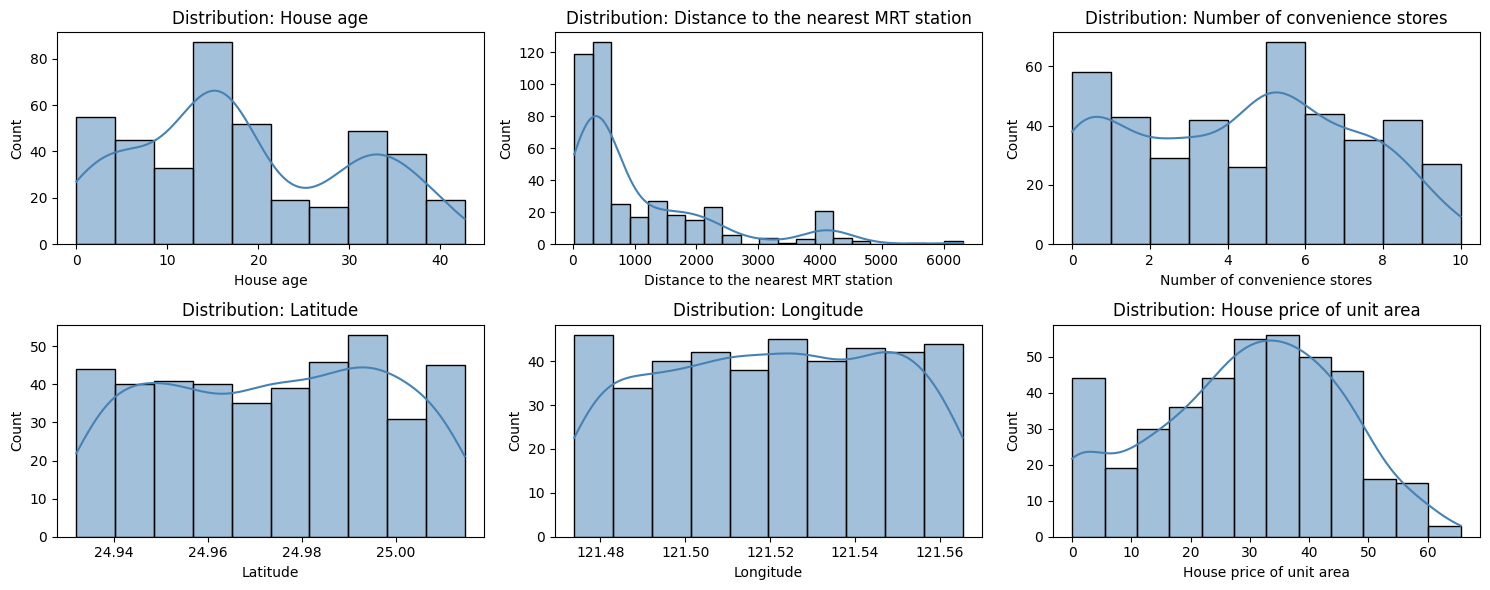

In [7]:
# Histograms for numeric columns
n = len(numeric_cols)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue")
    axes[i].set_title(f"Distribution: {col}")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

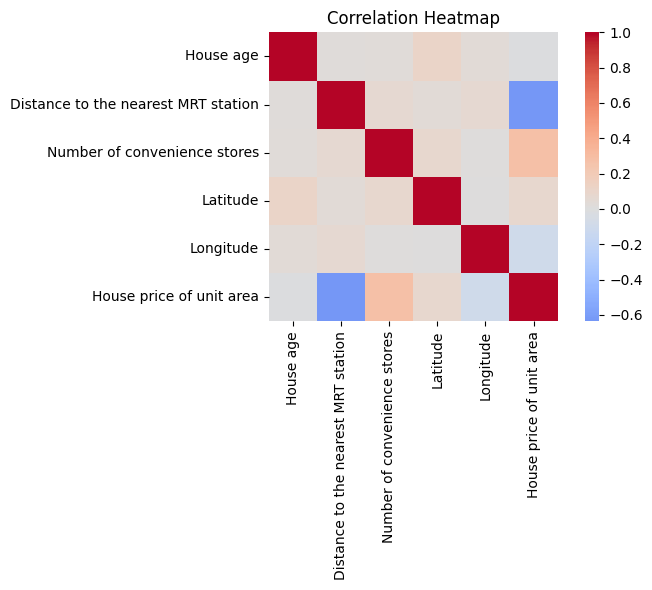

In [8]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False, square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

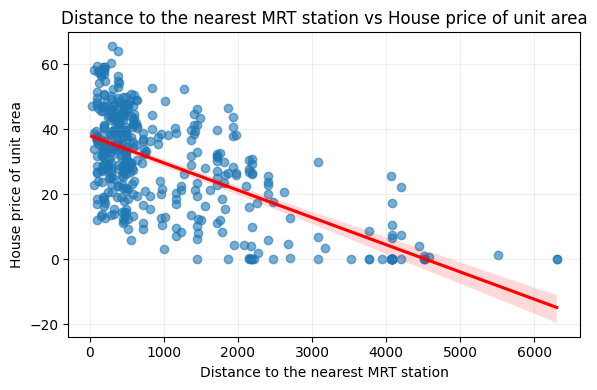

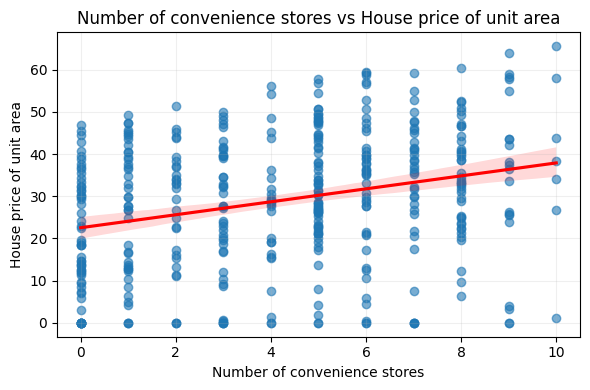

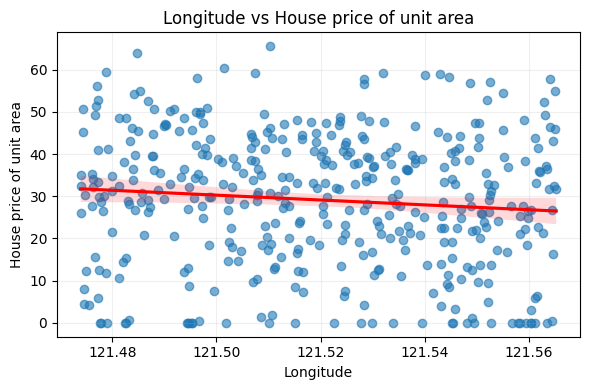

In [9]:
# Top 3 predictors vs target (separate plots)
top_feats = corr_to_target.drop(labels=[target]).abs().sort_values(ascending=False).head(3).index

for feat in top_feats:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=feat, y=target, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
    plt.title(f"{feat} vs {target}")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11844\402773523.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.assign(_dt=dt).dropna(subset=['_dt']).groupby(pd.Grouper(key='_dt', freq='M'))[target].mean()


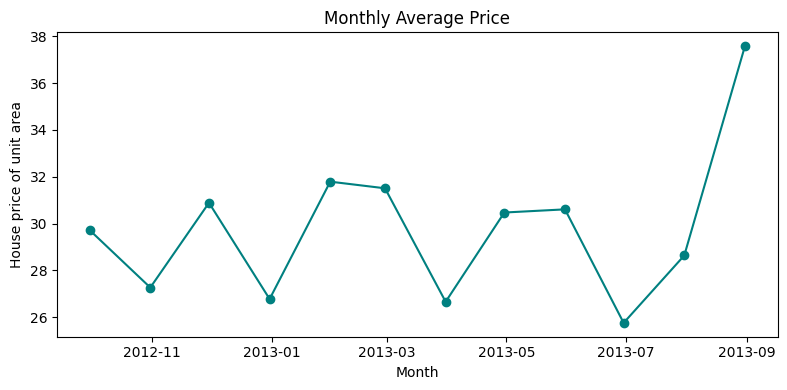

In [10]:

# Price over time (monthly average)
dt = pd.to_datetime(df['Transaction date'], errors='coerce')
ts = df.assign(_dt=dt).dropna(subset=['_dt']).groupby(pd.Grouper(key='_dt', freq='M'))[target].mean()
plt.figure(figsize=(8,4))
plt.plot(ts.index, ts.values, marker='o', color='teal')
plt.title("Monthly Average Price")
plt.xlabel("Month")
plt.ylabel(target)
plt.tight_layout()
plt.show()

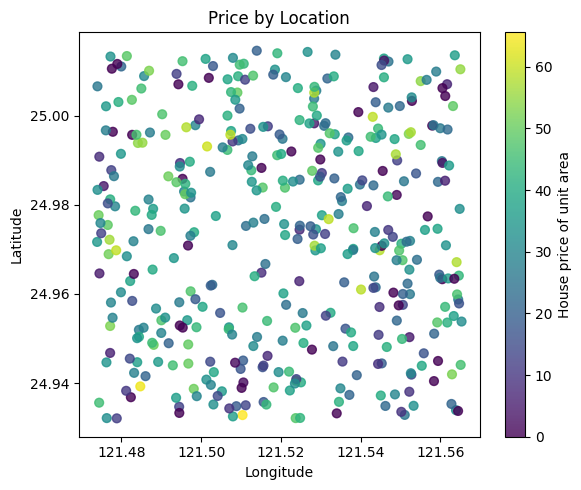

In [11]:
# Spatial view: price by location
plt.figure(figsize=(6,5))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df[target], cmap='viridis', alpha=0.8, s=40)
plt.colorbar(sc, label=target)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price by Location")
plt.tight_layout()
plt.show()

## **Select features (independent variables) and target (dependent variable)**

In [12]:

 
X = df.drop(columns=['House price of unit area','Transaction date'], errors='ignore')
y = df['House price of unit area'].copy()


## **Split into train and test sets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Create and train model**

In [14]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Predictions**

In [15]:

y_pred = model.predict(X_test)

## **Visualize model performance**

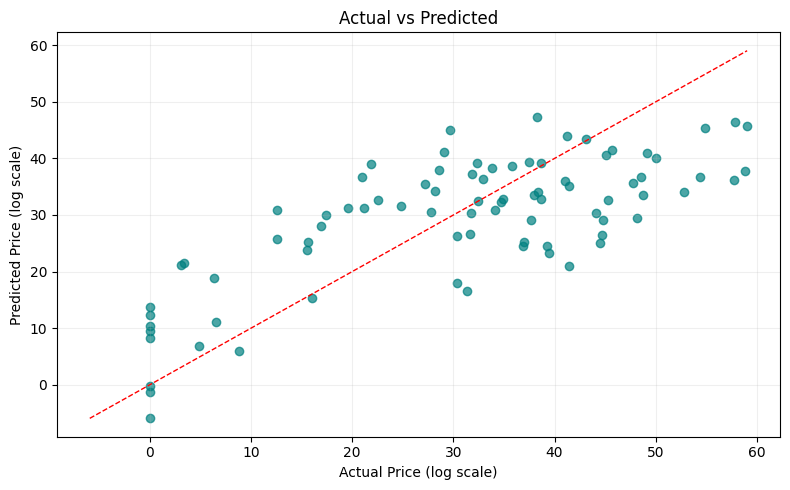

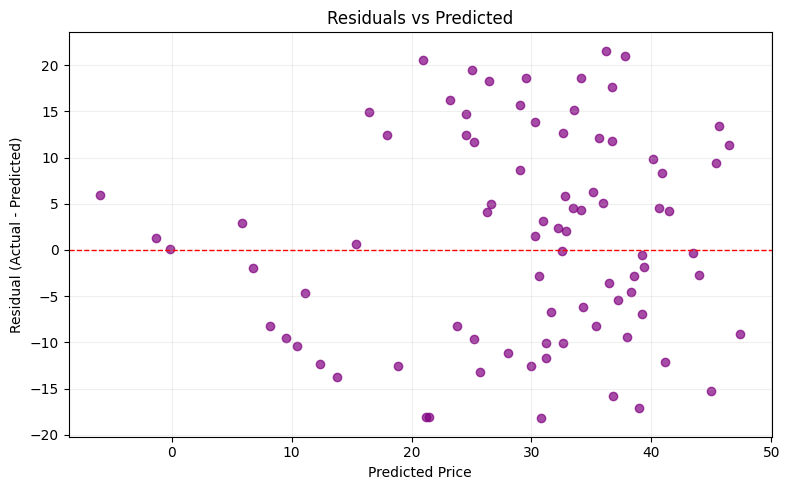

In [18]:
# 1) Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--', linewidth=1)
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Actual vs Predicted')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# 2) Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color="purple")
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


## **Evaluation**

In [17]:


from sklearn.metrics import mean_absolute_error, mean_squared_error 
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


R2 Score: 0.5495657614291165
MAE: 9.518530054594057
RMSE: 11.162843441979806
                                     Coefficient
House age                               0.001251
Distance to the nearest MRT station    -0.008351
Number of convenience stores            1.816828
Latitude                               64.342391
Longitude                             -36.157554


---